In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers

main_directory = '/content/drive/MyDrive/data'
img_height, img_width = 224, 224
batch_size = 32

# Use ImageDataGenerator for data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Create training data generator with data augmentation
train_generator = datagen.flow_from_directory(
    main_directory,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Create validation data generator
validation_generator = datagen.flow_from_directory(
    main_directory,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Data augmentation layers
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.1),
    ]
)

# Main model
model = tf.keras.models.Sequential([
    data_augmentation,
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10
)

# Evaluate the model on the validation set
evaluation_result = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print("Validation Loss:", evaluation_result[0])
print("Validation Accuracy:", evaluation_result[1])


Found 17120 images belonging to 5 classes.
Found 4277 images belonging to 5 classes.
Epoch 1/10
535/535 [==============================] - 4185s 8s/step - loss: 1.2015 - accuracy: 0.6150 - val_loss: 1.1057 - val_accuracy: 0.6194
Epoch 2/10
535/535 [==============================] - 394s 737ms/step - loss: 1.0425 - accuracy: 0.6276 - val_loss: 1.0089 - val_accuracy: 0.6358
Epoch 3/10
535/535 [==============================] - 398s 744ms/step - loss: 0.9996 - accuracy: 0.6363 - val_loss: 0.9880 - val_accuracy: 0.6335
Epoch 4/10
535/535 [==============================] - 417s 780ms/step - loss: 0.9680 - accuracy: 0.6430 - val_loss: 0.9447 - val_accuracy: 0.6433
Epoch 5/10
535/535 [==============================] - 403s 754ms/step - loss: 0.9379 - accuracy: 0.6496 - val_loss: 0.9299 - val_accuracy: 0.6438
Epoch 6/10
535/535 [==============================] - 397s 742ms/step - loss: 0.9138 - accuracy: 0.6576 - val_loss: 0.9144 - val_accuracy: 0.6478
Epoch 7/10
535/535 [=====================

1/1 [==============================] - 0s 36ms/step


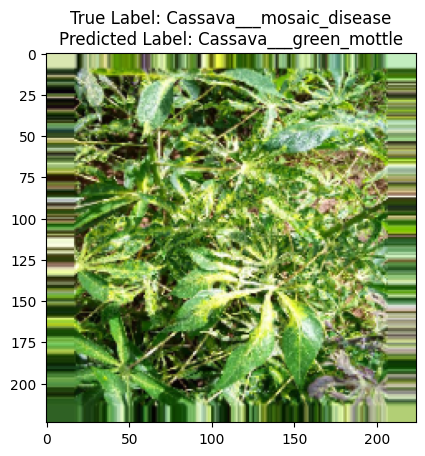

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load an image from the test set (adjust the index as needed)
test_image, true_label = validation_generator[110]

# Predict the class probabilities for the loaded image
predictions = model.predict(test_image)

# Get the predicted class index
predicted_class_index = np.argmax(predictions[0])

# Map class index to class label
class_labels = list(train_generator.class_indices.keys())
predicted_class_label = class_labels[predicted_class_index]

# Display the image
plt.imshow(test_image[0])
plt.title(f'True Label: {class_labels[np.argmax(true_label)]}\nPredicted Label: {predicted_class_label}')
plt.show()


#example of an incorrect result for demonstration purpose

In [6]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import ResNet50

# Define image dimensions and batch size


# Load the pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for classification
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(train_generator.num_classes, activation='softmax')(x)

# Create the final model
model = models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks, e.g., ModelCheckpoint for saving the best model during training
checkpoint = ModelCheckpoint('resnet_model.h5', save_best_only=True)

c

Epoch 1/10
535/535 [==============================] - ETA: 0s - loss: 1.1992 - accuracy: 0.6110

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


535/535 [==============================] - 502s 917ms/step - loss: 1.1992 - accuracy: 0.6110 - val_loss: 1.1432 - val_accuracy: 0.6151
Epoch 2/10
535/535 [==============================] - 421s 786ms/step - loss: 1.1711 - accuracy: 0.6149 - val_loss: 1.1287 - val_accuracy: 0.6156
Epoch 3/10
535/535 [==============================] - 415s 777ms/step - loss: 1.1568 - accuracy: 0.6149 - val_loss: 1.1260 - val_accuracy: 0.6168
Epoch 4/10
535/535 [==============================] - 413s 771ms/step - loss: 1.1478 - accuracy: 0.6149 - val_loss: 1.1147 - val_accuracy: 0.6147
Epoch 5/10
535/535 [==============================] - 416s 776ms/step - loss: 1.1384 - accuracy: 0.6149 - val_loss: 1.1185 - val_accuracy: 0.6151
Epoch 6/10
535/535 [==============================] - 415s 776ms/step - loss: 1.1333 - accuracy: 0.6149 - val_loss: 1.1082 - val_accuracy: 0.6151
Epoch 7/10
535/535 [==============================] - 409s 764ms/step - loss: 1.1330 - accuracy: 0.6149 - val_loss: 1.1103 - val_accura

In [7]:
from tensorflow.keras.applications import InceptionV3

# ... (previous code)

# Load the pre-trained InceptionV3 model without the top layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for classification
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(train_generator.num_classes, activation='softmax')(x)

# Create the final model
model = models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10
)

# Evaluate the model on the validation set
evaluation_result = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print("Validation Loss:", evaluation_result[0])
print("Validation Accuracy:", evaluation_result[1])


87910968/87910968 [==============================] - 0s 0us/step


Epoch 1/10
535/535 [==============================] - 418s 765ms/step - loss: 1.0110 - accuracy: 0.6403 - val_loss: 0.8850 - val_accuracy: 0.6715
Epoch 2/10
535/535 [==============================] - 411s 768ms/step - loss: 0.9202 - accuracy: 0.6621 - val_loss: 0.8550 - val_accuracy: 0.6793
Epoch 3/10
535/535 [==============================] - 410s 766ms/step - loss: 0.9098 - accuracy: 0.6672 - val_loss: 0.8414 - val_accuracy: 0.6915
Epoch 4/10
535/535 [==============================] - 410s 768ms/step - loss: 0.8883 - accuracy: 0.6711 - val_loss: 0.8341 - val_accuracy: 0.6884
Epoch 5/10
535/535 [==============================] - 409s 765ms/step - loss: 0.8770 - accuracy: 0.6740 - val_loss: 0.8373 - val_accuracy: 0.6910
Epoch 6/10
535/535 [==============================] - 405s 757ms/step - loss: 0.8698 - accuracy: 0.6776 - val_loss: 0.8266 - val_accuracy: 0.6936
Epoch 7/10
535/535 [==============================] - 407s 762ms/step - loss: 0.8680 - accuracy: 0.6783 - val_loss: 0.8309 -

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# ... (previous code)

# Define the AlexNet model with hyperparameters
model = models.Sequential()

# Layer 1
model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Layer 2
model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Layer 3
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))

# Layer 4
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))

# Layer 5
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Flatten the output
model.add(Flatten())

# Fully connected layers with dropout for regularization
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))  # Add dropout for regularization
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))  # Add dropout for regularization
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Compile the model with hyperparameters
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# ... (remaining code)
# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10
)

# Evaluate the model on the validation set
evaluation_result = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print("Validation Loss:", evaluation_result[0])
print("Validation Accuracy:", evaluation_result[1])



Epoch 1/10
535/535 [==============================] - 400s 739ms/step - loss: 1.2836 - accuracy: 0.6127 - val_loss: 1.1855 - val_accuracy: 0.6144
Epoch 2/10
535/535 [==============================] - 394s 736ms/step - loss: 1.1896 - accuracy: 0.6149 - val_loss: 1.1856 - val_accuracy: 0.6140
Epoch 3/10
535/535 [==============================] - 400s 748ms/step - loss: 1.1894 - accuracy: 0.6149 - val_loss: 1.1893 - val_accuracy: 0.6144
Epoch 4/10
535/535 [==============================] - 399s 745ms/step - loss: 1.1890 - accuracy: 0.6149 - val_loss: 1.1838 - val_accuracy: 0.6149
Epoch 5/10
535/535 [==============================] - 394s 736ms/step - loss: 1.1861 - accuracy: 0.6149 - val_loss: 1.1849 - val_accuracy: 0.6154
Epoch 6/10
130/535 [======>.......................] - ETA: 4:04 - loss: 1.1903 - accuracy: 0.6132